## ArUco markers example
Ref - 
1. https://www.pyimagesearch.com/2020/12/14/generating-aruco-markers-with-opencv-and-python/
2. Online ArUco generator https://chev.me/arucogen/
3. https://www.pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/

### Load Package

In [1]:
import cv2
import numpy as np
import os

from matplotlib import pyplot as plt

In [2]:
cv2.__version__

'4.2.0'

### Constant

In [3]:
# ArUco Dictionary (DICT_NxN_M) -- Define the mapping between ArUco marker and encoded ID
# NXN -- 2D bit size of the ArUco marker.
# M -- Total number of unique ArUco IDs. 
#      Larger bit size with smaller unique ID increases the inter-marker distance
#      => Less prone to false readings
ARUCO_DICT = {
    "DICT_4X4_50": cv2.aruco.DICT_4X4_50,
    "DICT_4X4_100": cv2.aruco.DICT_4X4_100,
    "DICT_4X4_250": cv2.aruco.DICT_4X4_250,
    "DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
    "DICT_5X5_50": cv2.aruco.DICT_5X5_50,
    "DICT_5X5_100": cv2.aruco.DICT_5X5_100,
    "DICT_5X5_250": cv2.aruco.DICT_5X5_250,
    "DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
    "DICT_6X6_50": cv2.aruco.DICT_6X6_50,
    "DICT_6X6_100": cv2.aruco.DICT_6X6_100,
    "DICT_6X6_250": cv2.aruco.DICT_6X6_250,
    "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
    "DICT_7X7_50": cv2.aruco.DICT_7X7_50,
    "DICT_7X7_100": cv2.aruco.DICT_7X7_100,
    "DICT_7X7_250": cv2.aruco.DICT_7X7_250,
    "DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
    "DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
    "DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
    "DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
    "DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
    "DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11}

### Parameter

In [4]:
ARUCO_DICT_TYPE = 'DICT_7X7_100'
ARUCO_BORDER_NBIT = 1           # width of the marker border in bits
ARUCO_IMG_SIZE = 500            # size of the image in pixels

In [94]:
OUT_ID_NUM = 10
OUT_ID_SIZE = [10, 80]

### Initialize ArUco Dictionary

In [6]:
aruco_dict = cv2.aruco.Dictionary_get(ARUCO_DICT[ARUCO_DICT_TYPE])

### Create ArUco Marker

In [54]:
def create_aruco_marker(aruco_dict, ids, img_sizes=ARUCO_IMG_SIZE):
    # Initialize img size
    if type(img_sizes) == int:
        img_sizes = [img_sizes] * len(ids)

    # Create markers
    markers = []
    for id, img_size in zip(ids, img_sizes):
        marker = np.zeros((img_size, img_size), dtype=np.uint8)
        _ = cv2.aruco.drawMarker(aruco_dict, id, img_size, marker, ARUCO_BORDER_NBIT)
        markers.append(marker)

    return markers

In [113]:
# Random select ArUco IDs (Also use IDs as its size)
marker_ids = np.random.choice(np.arange(OUT_ID_SIZE[0], OUT_ID_SIZE[1]), OUT_ID_NUM)
marker_ids

array([42, 27, 71, 32, 18, 44, 29, 57, 64, 42])

In [114]:
# Create markers on canvas
canvas = np.ones((ARUCO_IMG_SIZE, ARUCO_IMG_SIZE), dtype=np.uint8) * 255

for mid, marker in enumerate(create_aruco_marker(aruco_dict, marker_ids, marker_ids)):
    # Random marker position
    x, y = np.random.choice(np.arange(OUT_ID_SIZE[1], ARUCO_IMG_SIZE - OUT_ID_SIZE[1]), 2)

    # Place marker
    canvas[y:y+marker_ids[mid], x:x+marker_ids[mid]] = marker

### ArUco Marker Detection

In [115]:
# Define the ArUco detection parameters
arucoParams = cv2.aruco.DetectorParameters_create()

In [116]:
# Detection
# corners_list (List[numpy array]) -- List of (x, y) coordinates (numpy array of (1, 4, 2)) of detected markers.
# ids (numpy array) -- Index of detected marker.
# rejected (List[numpy array]) -- Rejected list of (x, y) coordinates of potential markers.
corners_list, ids, rejected = cv2.aruco.detectMarkers(canvas, aruco_dict, parameters=arucoParams)

In [117]:
# Visualization
img_show = cv2.cvtColor(canvas, cv2.COLOR_GRAY2RGB)

for corners, id in zip(corners_list, ids):
    # Get coordinate
    pt1 = (int(corners[0, 0, 0]), int(corners[0, 0, 1]))
    pt2 = (int(corners[0, 1, 0]), int(corners[0, 1, 1]))
    pt3 = (int(corners[0, 2, 0]), int(corners[0, 2, 1]))
    pt4 = (int(corners[0, 3, 0]), int(corners[0, 3, 1]))

    # Draw ROI
    cv2.line(img_show, pt1, pt2, (0, 255, 0), 2)
    cv2.line(img_show, pt2, pt3, (0, 255, 0), 2)
    cv2.line(img_show, pt3, pt4, (0, 255, 0), 2)
    cv2.line(img_show, pt4, pt1, (0, 255, 0), 2)

    cv2.putText(img_show, str(id), (pt1[0], pt1[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

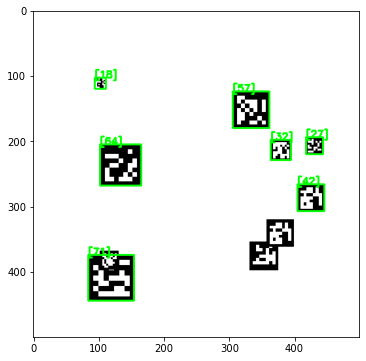

In [118]:
# Visualization
plt.figure(figsize=(6, 6))
plt.imshow(img_show)

### ArUco Marker Visualization

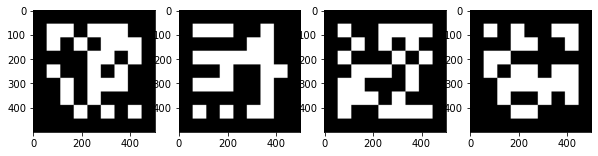

In [58]:
# Marker IDs
marker_ids = [0, 1, 2, 3]

# Create & Plot marker
fig = plt.figure(figsize=[10, 4])
for mid, marker in enumerate(create_aruco_marker(aruco_dict, marker_ids)):
    plt.subplot(1, len(marker_ids), mid + 1)
    plt.imshow(marker, cmap='gray')